<a href="https://colab.research.google.com/github/icarocarmona/pos-tech-dtat/blob/main/f2_ml_and_time_series/ml_with_python/Aula_4_Avaliando_o_Melhor_Modelo_de_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
imoveis = pd.read_csv('https://raw.githubusercontent.com/FIAP/Pos_Tech_DTAT/61a634996879d5c1384af6f567e29659ad68b727/Aula%2005/Base%20de%20Dados/Valorizacao_Ambiental.csv', sep=';')

- Area = Tamanho da área do imóvel
- IA = idade do imóvel
- Andar = Quantidade de andares
- Suites = Quantidade de suites
- Vista = se o imóvel tem uma boa vista ou não
- DisBM = distancia do imóvel do mar
- SemRuido = se o imóvel esta em uma area calma ou não
- AV100m = Distancia proxima à area verde

In [5]:
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1
3,4,110000,180,12,4,1,0,245,0,0
4,5,70000,120,15,3,1,0,956,1,0


In [6]:
imoveis.shape

(172, 10)

In [7]:
imoveis.isnull().sum()

Ordem       0
Valor       0
Area        0
IA          0
Andar       0
Suites      0
Vista       0
DistBM      0
Semruido    0
AV100m      0
dtype: int64

In [8]:
imoveis.describe().round(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,86.50,173541.95,163.20,5.65,4.30,1.40,0.14,505.89,0.58,0.35
std,49.80,99827.09,65.92,5.57,2.24,1.13,0.35,395.05,0.49,0.48
min,1.00,40000.00,69.00,1.00,1.00,0.00,0.00,73.00,0.00,0.00
25%,43.75,104750.00,117.00,1.00,2.75,1.00,0.00,214.75,0.00,0.00
50%,86.50,149000.00,145.00,2.50,4.00,1.00,0.00,402.50,1.00,0.00
75%,129.25,209250.00,182.00,11.00,6.00,2.00,0.00,638.00,1.00,1.00
max,172.00,579840.00,393.00,19.00,12.00,6.00,1.00,1859.00,1.00,1.00


Text(0.5, 1.0, 'Histograma da variável valor')

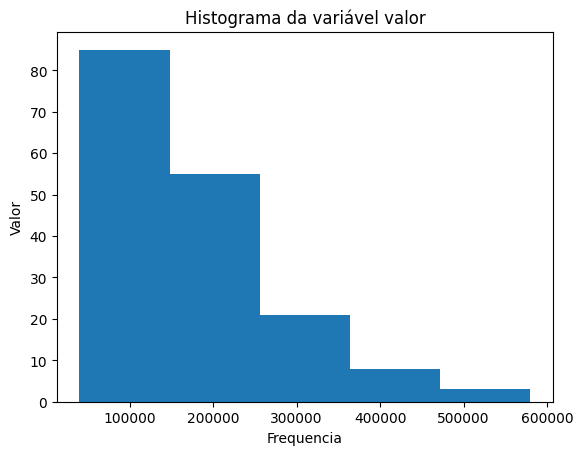

In [9]:

plt.hist(imoveis["Valor"],bins=5)
plt.xlabel("Frequencia")
plt.ylabel("Valor")
plt.title("Histograma da variável valor")

In [10]:
imoveis["raiz_valor"] = np.sqrt(imoveis['Valor'])

In [11]:
imoveis["raiz_valor"]

0      400.000000
1      258.843582
2      435.889894
3      331.662479
4      264.575131
          ...    
167    282.842712
168    379.473319
169    419.523539
170    447.164399
171    379.473319
Name: raiz_valor, Length: 172, dtype: float64

Text(0.5, 1.0, 'Histograma da variável valor')

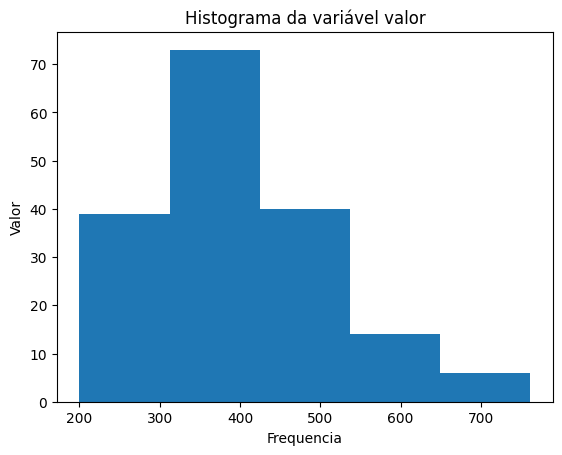

In [12]:
plt.hist(imoveis["raiz_valor"],bins=5)
plt.xlabel("Frequencia")
plt.ylabel("Valor")
plt.title("Histograma da variável valor")

Text(0, 0.5, 'Qtd de suites')

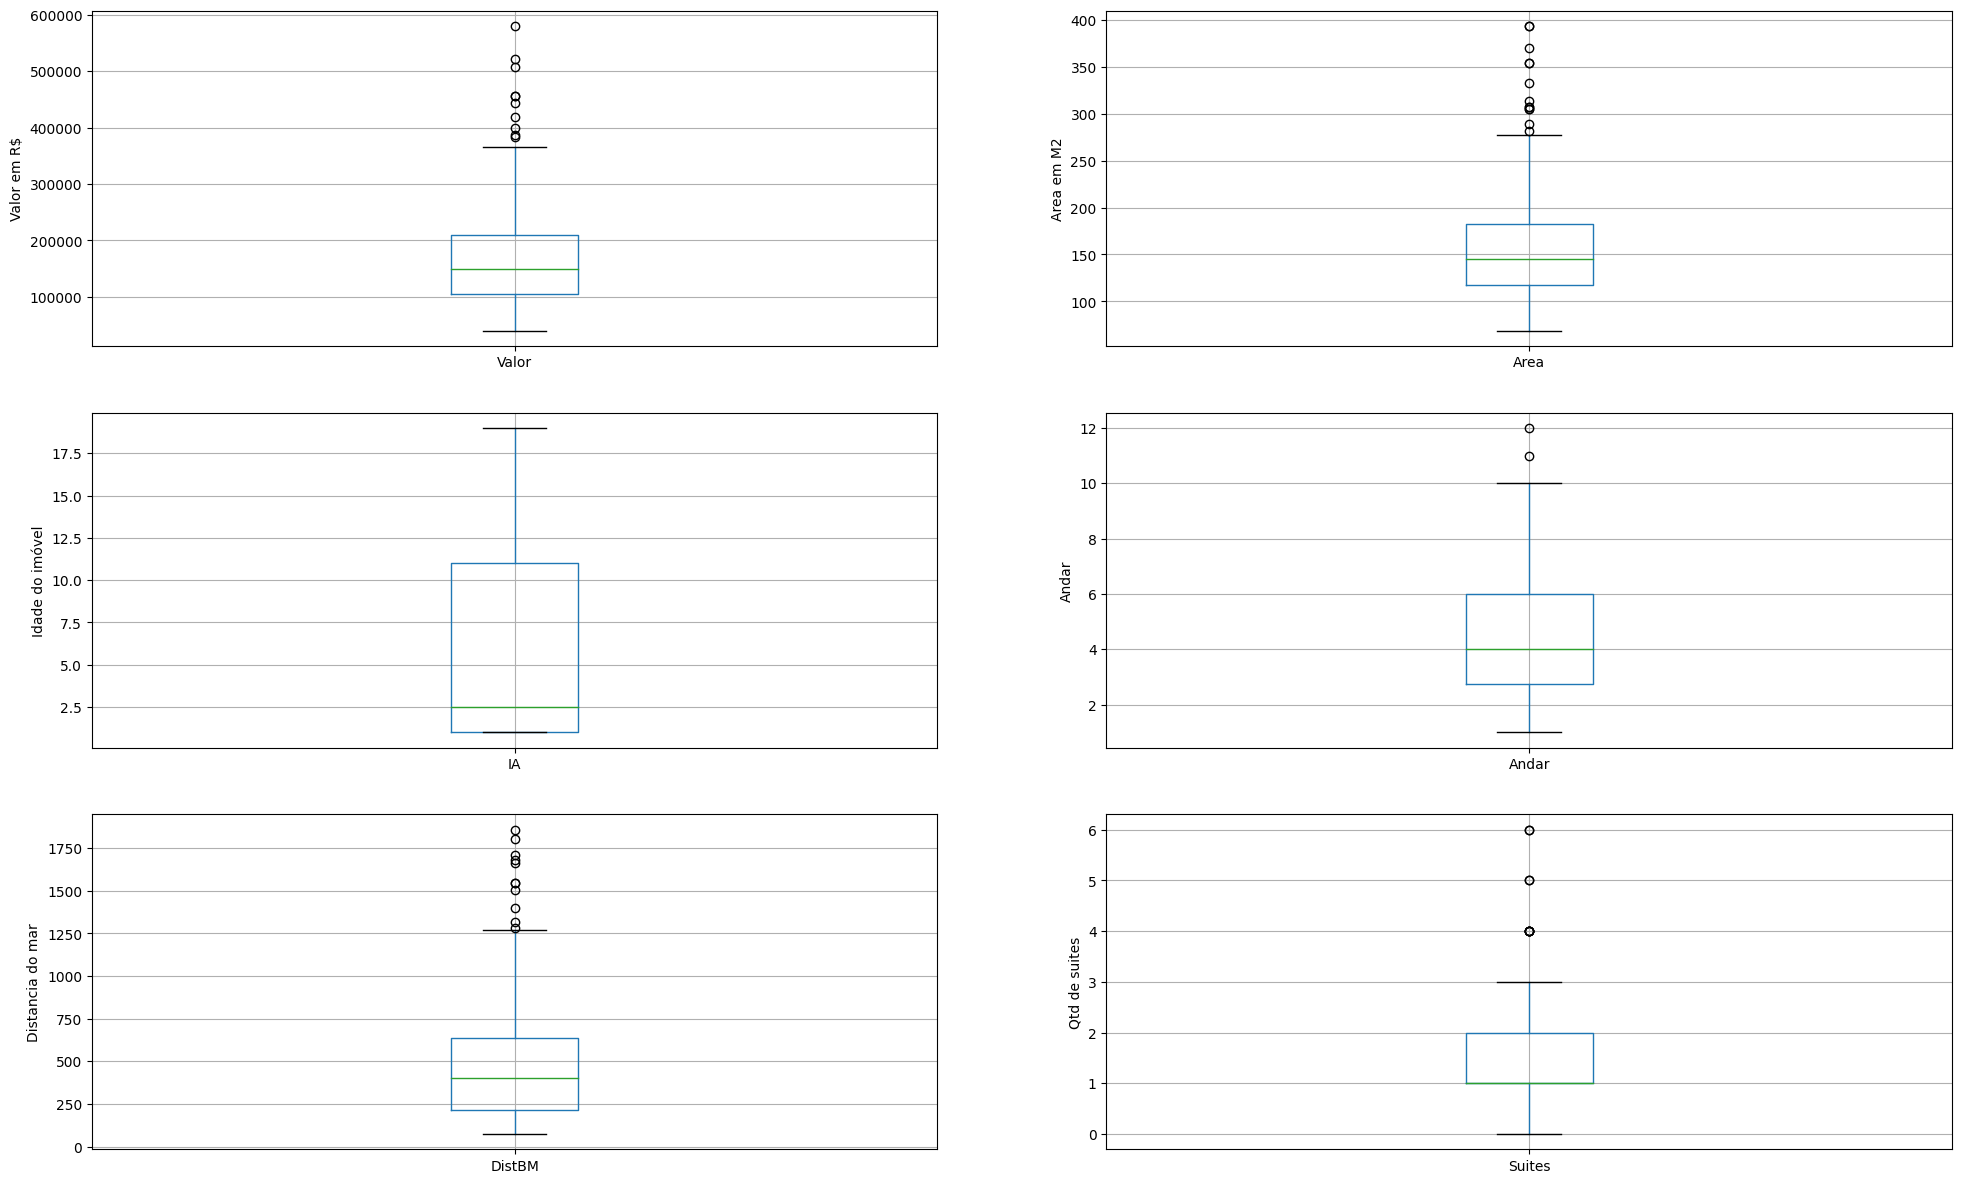

In [13]:
plt.figure(figsize=(24,20))

plt.subplot(4,2,1)
fig = imoveis.boxplot(column = "Valor")
fig.set_title("")
fig.set_ylabel("Valor em R$")

plt.subplot(4,2,2)
fig = imoveis.boxplot(column = "Area")
fig.set_title("")
fig.set_ylabel("Area em M2")

plt.subplot(4,2,3)
fig = imoveis.boxplot(column = "IA")
fig.set_title("")
fig.set_ylabel("Idade do imóvel")

plt.subplot(4,2,4)
fig = imoveis.boxplot(column = "Andar")
fig.set_title("")
fig.set_ylabel("Andar")


plt.subplot(4,2,5)
fig = imoveis.boxplot(column = "DistBM")
fig.set_title("")
fig.set_ylabel("Distancia do mar")

plt.subplot(4,2,6)
fig = imoveis.boxplot(column = "Suites")
fig.set_title("")
fig.set_ylabel("Qtd de suites")




<Axes: >

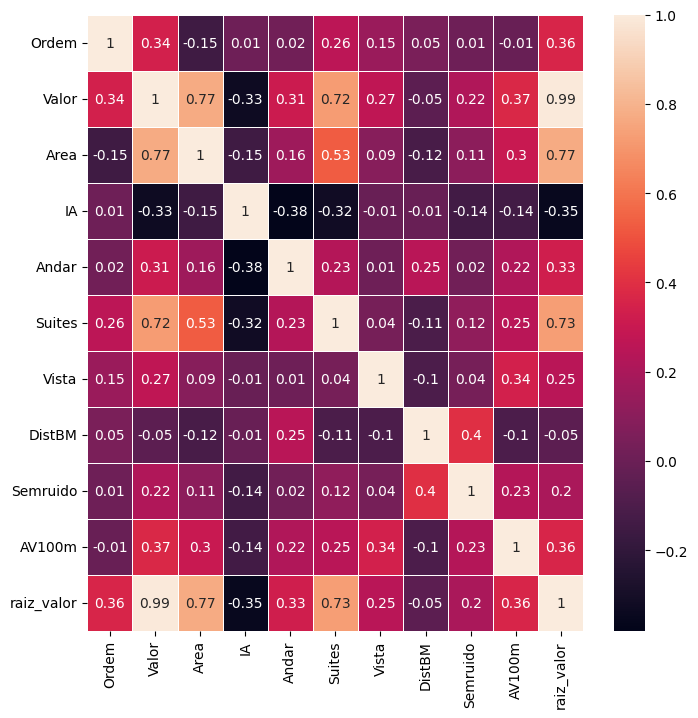

In [14]:
correlation_matrix = imoveis.corr().round(2)
fig, ax = plt.subplots(figsize=(8,8))

sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)


Text(0.5, 1.0, 'Area do imóvel x valor')

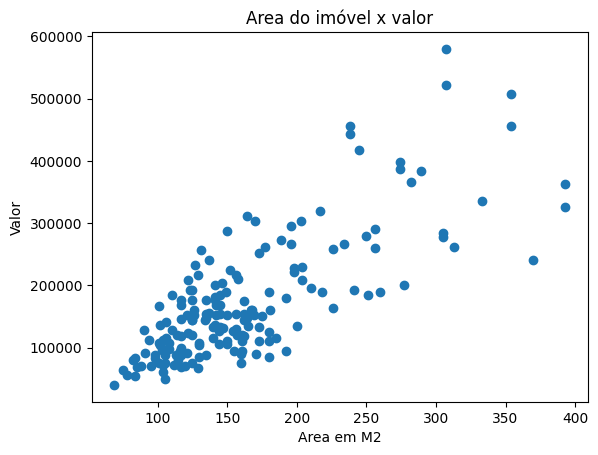

In [15]:
plt.scatter("Area", "Valor", data=imoveis)
plt.xlabel("Area em M2")
plt.ylabel("Valor")
plt.title("Area do imóvel x valor")

Text(0.5, 1.0, 'Idade do imóvel x valor')

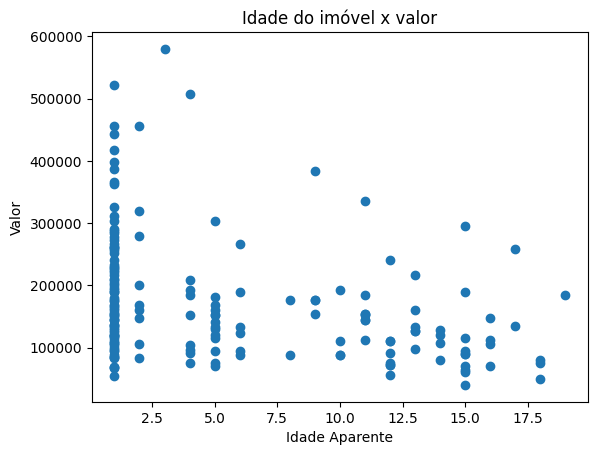

In [16]:
plt.scatter("IA", "Valor", data=imoveis)
plt.xlabel("Idade Aparente")
plt.ylabel("Valor")
plt.title("Idade do imóvel x valor")

<Axes: xlabel='Vista', ylabel='Valor'>

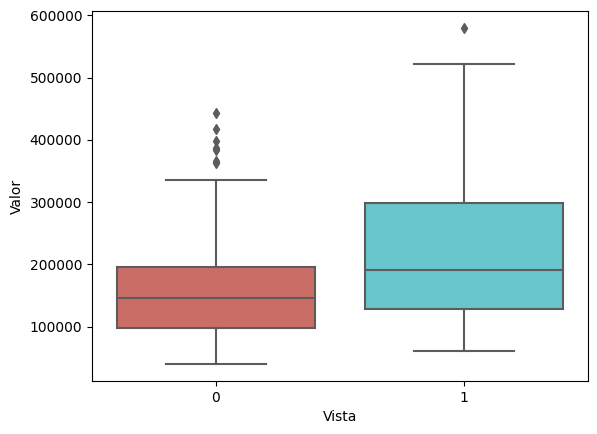

In [17]:
sb.boxplot(data=imoveis, x="Vista", y="Valor", palette="hls")

<Axes: xlabel='Semruido', ylabel='Valor'>

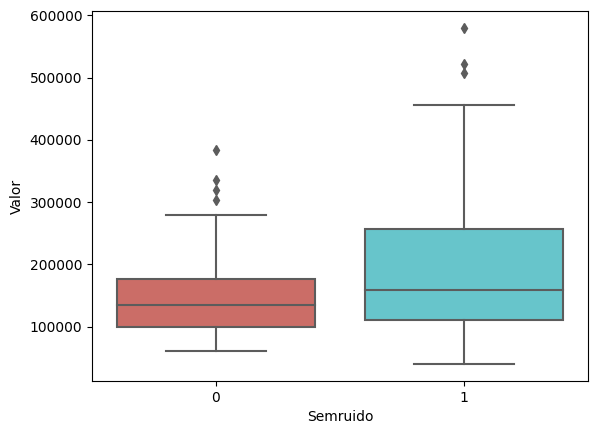

In [18]:
sb.boxplot(data=imoveis, x="Semruido", y="Valor", palette="hls")

<Axes: xlabel='AV100m', ylabel='Valor'>

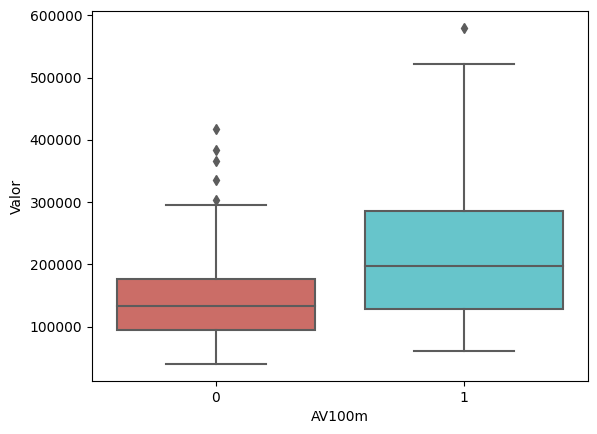

In [19]:
sb.boxplot(data=imoveis, x="AV100m", y="Valor", palette="hls")

In [20]:
# regressão linear múltipla
from sklearn.linear_model import LinearRegression

# criando um obj de regressão linear
lr = LinearRegression()

In [21]:
#X contem as variáveis preditoras ou independentes
X = imoveis[['Area', 'Suites', 'IA', 'Semruido', 'Vista', 'Andar', 'AV100m', 'DistBM']]

# y variáveis target ou dependente
y = imoveis[[ 'Valor']]


In [22]:
from sklearn.model_selection import train_test_split

# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = 101)

In [23]:
#treinando o modelo
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
# Calculando o valor predito da variável resposta na amostra de teste
y_pred = lr.predict(X_test)

In [25]:
# primeiro, vamos olhar o Intercepto e os Coeficientes da Regressão
# representa o valor esperado da variável dependente quando todas as variáveis independentes são iguais:
# em termos gráficos, o intercepto é o ponto onde a linha de regressão cruza o eixo vertical (eixo y)

print('Intercepto:', lr.intercept_)

Intercepto: [-40165.8752773]


In [26]:
# os coeficientes da regressao linear representam as inclunações da linha d eregressão para cada variável

coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(lr.coef_))], axis=1)
coefficients

,0,0
0,Area,815.218075
1,Suites,34315.785459
2,IA,-1052.417100
3,Semruido,17027.508944
4,Vista,63486.030935
5,Andar,5635.237485
6,AV100m,-5672.535051
7,DistBM,-2.522530


In [27]:
def plt_regplot(y_test, y_pred):
  fig = plt.figure(figsize=(8,6), dpi=80)
  plt.rcParams.update({'font.size':14})
  ax = sb.regplot(x = y_test, y = y_pred)
  ax.set(xlabel='y real', ylabel='y predito')
  ax = plt.plot(y_test,y_test, '--r')

  plt.show()

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
def avaliando_modelo(ytest, ypred):
  plt_regplot(ytest, ypred)
  # avaliando o modelo
  MAE = mean_absolute_error(ytest, ypred)
  MSE = mean_squared_error(ytest, ypred)
  r2 = r2_score(ytest, ypred)

  print('MAE', MAE) # é a média do valor absoluto dos erros
  print('MSE', MSE) # é a média dos erros quadráticos
  print('r²', r2) # R-quadrado

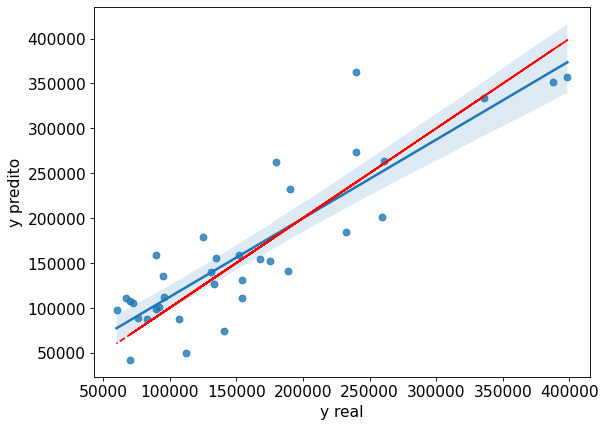

MAE 34422.98857094584
MSE 1844288772.1790097
r² 0.7584591969125003


In [30]:
avaliando_modelo(y_test, y_pred)

# Avaliando com DecisionTreeRegressor

Observamos que nosso modelo de regressão linear se comportou bem, mas e se tentarmos criar um novo modelo sob um outro tipo de algoritmo diferente?


Um modelo de DecisionTreeRegressor é um modelo de árvore de decisão utilizado para resolver problemas de refressão. Esse tipo de técnica cria uma estrtura em forma de árvore para mapear relações não lineares entre as variáveis preditoras e variáveis alvo.

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
#criando o modelo
model_dtr = DecisionTreeRegressor(random_state=101, max_depth=10)
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=101)

In [33]:
y_pred_mode_dtr = model_dtr.predict(X_test)

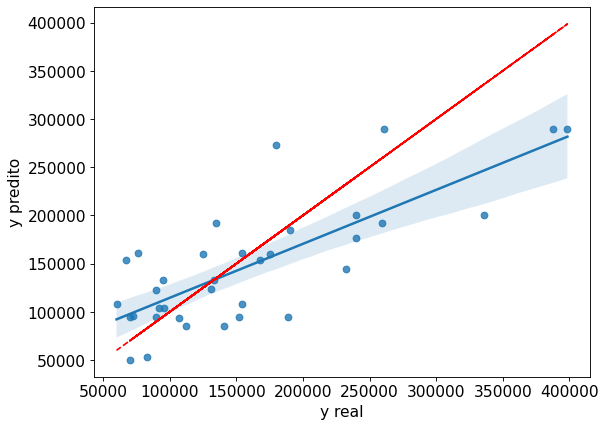

MAE 44913.75102040816
MSE 3223969337.3848395
r² 0.577766695417574


In [34]:
# avaliando o modelo
avaliando_modelo(y_test,y_pred_mode_dtr)

# Avaliando com SVR
O SVR Support Vector Regression, é usado para tarefas de regressão, em que a tarefa é prever um valor contínuo em vez de uma classe.

In [35]:
from sklearn.svm import SVR

In [36]:
svr = SVR(kernel= 'linear')

In [37]:
svr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [38]:
  y_pred_svr = svr.predict(X_test)

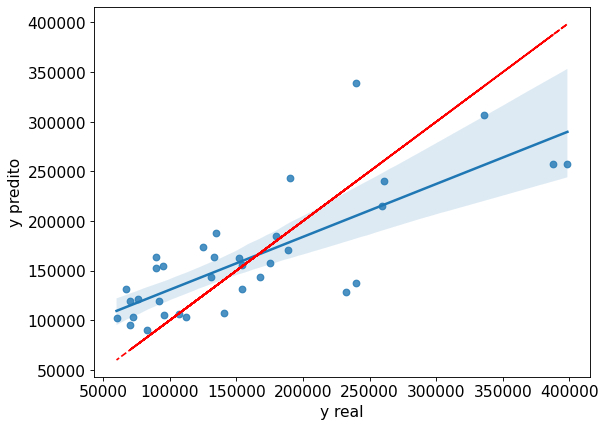

MAE 43153.53918496288
MSE 3123421996.7782364
r² 0.5909350700044546


In [39]:
avaliando_modelo(y_test, y_pred_svr)